#1. Perkenalan

    =================================================
    Milestone 2

    Nama  : Carlos Emmanuel Argado
    Batch : HCK-10

    Salary Classification
    =================================================

Tujuan dari milestone adalah memprediksi apakah seseorang memiliki gaji di atas USD 50K (1) atau di bawah USD 50K (0). Untuk mencari model terbaik, 5 model akan dievaluasi (KNN, SVM, Decision Tree, Random Forest, XGBoost) dan kemudian akan dilakukan cross-validation dan model tuning. Dalam menentukan model yang akan dipilih, pertimbangan yang dilihat adalah nilai recall untuk meminimalisir prediksi False Negative dan juga nilai train score yang ideal.

#2. import libraries

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import pearsonr

In [370]:
import pickle
import json
import plotly.express  as px
from sklearn.model_selection import train_test_split
import pickle
import plotly.express  as px
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [372]:
pip install feature-engine

#3. Data Loading

In [373]:
df = pd.read_csv('/content/salary_binary.csv')

In [374]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [375]:
df.duplicated().sum()

24

In [376]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [377]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [378]:
df_duplicate = df.copy()

In [379]:
df_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [380]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print(df[i].unique())

    print(('-')*50)

# 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'

age
73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------
workclass
9
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------
fnlwgt
21648
[ 77516  83311 215646 ...  34066  84661 257302]
--------------------------------------------------
education
16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------
education-num
16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------------------------------------
marital-status
7
[' Never-married' ' Married-ci

In [381]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [382]:
print(df['salary'].nunique())
print(df['salary'].unique())

2
[' <=50K' ' >50K']


#4. EDA

1. Average age by Marital Status

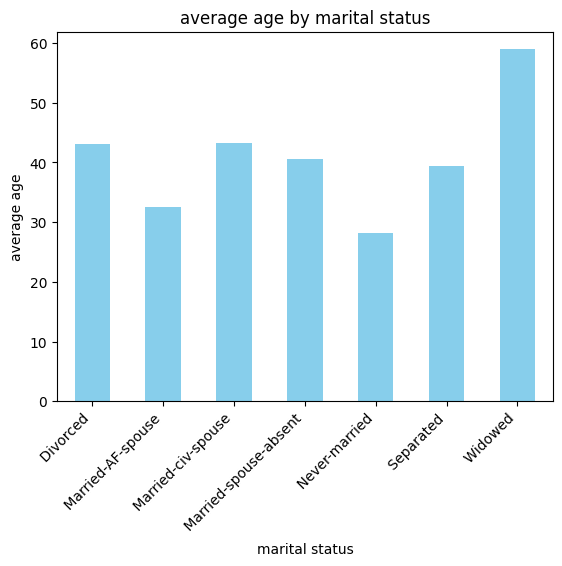

In [383]:
age_marital = df_duplicate.groupby('marital-status')['age'].mean()
age_marital.plot(kind='bar', color='skyblue')
plt.title('average age by marital status')
plt.xlabel('marital status')
plt.ylabel('average age')
plt.xticks(rotation=45, ha='right')
plt.show()

People with widowed status have the oldest average age. The assumption is that widowed people will have even distribution of wage over and under USD 50K considering that they lost their husband that was their income source.

2. Salary vs Working Hours

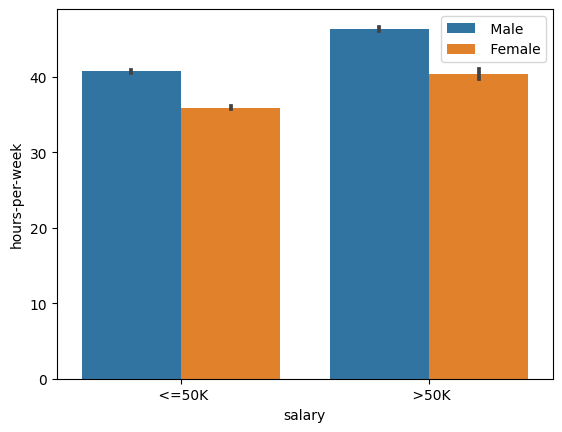

In [384]:
data = df_duplicate.groupby(['salary','sex'])['hours-per-week'].count()

sns.barplot(data = df, x='salary', y='hours-per-week', orient='v', hue='sex')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Male work more hours per week compared to female for both wages above and below USD 50K. It is predicted that more male will make more than USD 50K considering that people that work longer hours will make more salary.

3. Correlation of Age & Capital-Gain

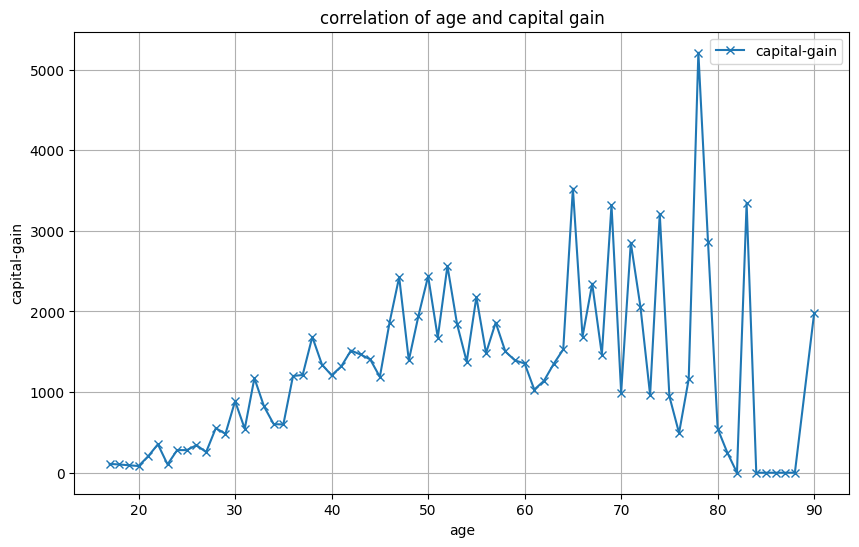

In [385]:
grouped = df_duplicate.groupby('age')[['capital-gain']].mean()
grouped.plot(kind='line', marker='x', figsize=(10, 6))

plt.xlabel('age')
plt.ylabel('capital-gain')
plt.title('correlation of age and capital gain')

plt.grid(True)
plt.show()

Overall, there is a positive correlation between age and capital gain. People should make more than USD 50K the older they get and more capital gain they have.

4. capital gain vs occupation

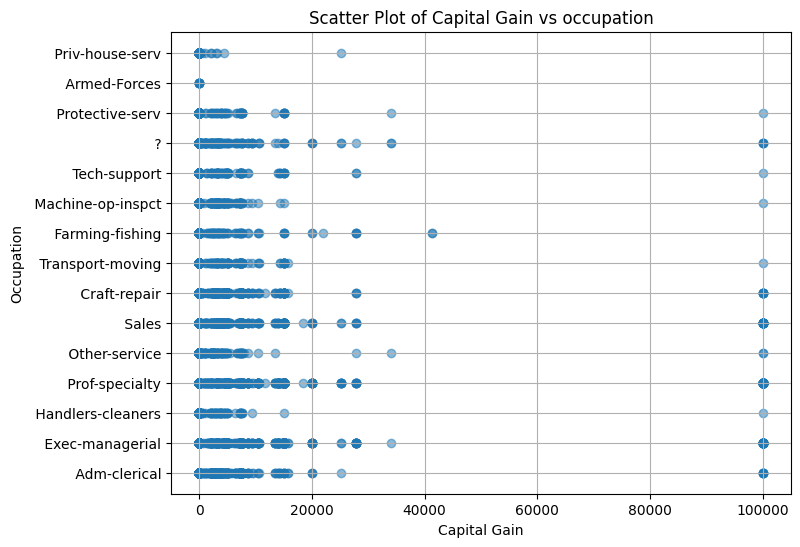

In [386]:
plt.figure(figsize=(8, 6))
plt.scatter(df_duplicate['capital-gain'], df_duplicate['occupation'], alpha=0.5)
plt.title('Scatter Plot of Capital Gain vs occupation')
plt.xlabel('Capital Gain')
plt.ylabel('Occupation')
plt.grid(True)
plt.show()

Farming-Fishing show the highest capital gain, where most occupations all experience the highest nominal. It is hard to predict which income category the listed occupations will generate considering the different types of nature the occupations have.

5. relationship, race, education number

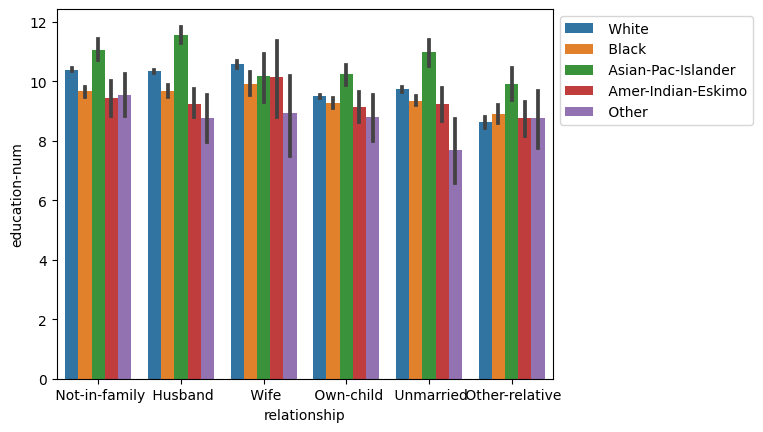

In [387]:
# grouping price berdasarkan sex & education level
data = df_duplicate.groupby(['relationship','race'])['education-num'].count()

# pembuatan barplot
sns.barplot(data = df, x='relationship', y='education-num', orient='v', hue='race')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Asian-Pac-Islander posses the most number of educations in all relationship status. Therefore, most of the people from that group should make more than USD 50K considering that more numbers of education equals higher pay.

6. Most popular occupations

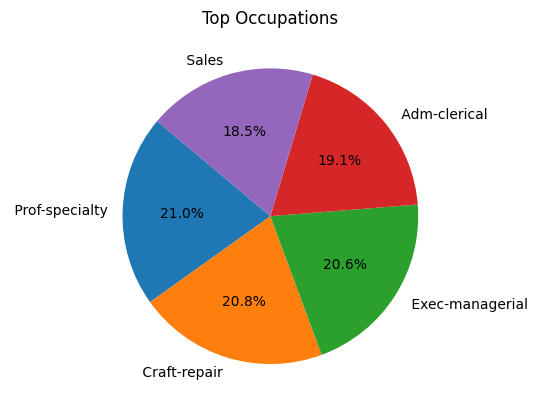

In [388]:
top_occupation = df_duplicate['occupation'].value_counts().head(5)

plt.pie(top_occupation, labels=top_occupation.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Occupations')
plt.show()

Prof-Specialty is the occupation with the most workers compared to the others.

#5. Feature Engineering

In [389]:
# Dilakukan mapping target data untuk memudahkan pemetaan prediksi
salary_mapping = {' <=50K': 0, ' >50K': 1}
df_duplicate['salary'] = df_duplicate['salary'].map(salary_mapping)

In [390]:
df_duplicate.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


##I. Cardinality

In [391]:
cols_cat = df_duplicate[['workclass', 'education', 'marital-status',
                          'occupation', 'relationship', 'race', 'sex', 'native-country']]

In [392]:
for i in cols_cat.columns:
    print(f'{i} cardinality:', cols_cat[i].nunique())

workclass cardinality: 9
education cardinality: 16
marital-status cardinality: 7
occupation cardinality: 15
relationship cardinality: 6
race cardinality: 5
sex cardinality: 2
native-country cardinality: 42


##II. Data Split

In [393]:
# splitting between x and y
x = df_duplicate.drop(['salary'], axis=1)
y = df_duplicate['salary']
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [394]:
# Splitting between Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

print('Train size', x_train.shape)
print('Test size', x_test.shape)
x_train.head()

Train size (26029, 14)
Test size (6508, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29199,19,Private,264593,Some-college,10,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States
29696,32,Private,29933,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,United-States
4432,40,Self-emp-not-inc,230478,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,30,United-States
13365,18,?,171748,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,24,United-States
15450,31,Self-emp-not-inc,325355,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [395]:
y_train.value_counts()

0    19743
1     6286
Name: salary, dtype: int64

Data y-train tidak memiliki persebaran yang rata pada nilai 0 dan 1. maka sebab itu, perlu dilakukan balancing melalui data smoothing.

##III. Handle missing value

In [396]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Tidak ada missing value pada x_train.

##IV. Outlier Handling

In [397]:
cols_num = x_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']]

In [398]:
# pengelompokan column skewed & normal dari column numerical
normal = []
skewed = []

for column in cols_num:
    skewness = cols_num[column].skew()
    if skewness < -0.5 or skewness > 0.5:
        skewed.append(column)
    elif skewness >= -0.5 or skewness <= 0.5:
        normal.append(column)

print(f'Column Numerik yang termasuk dalam skewed adalah {skewed}')
print(f'Column Numerik yang termasuk dalam normal adalah {normal}')

Column Numerik yang termasuk dalam skewed adalah ['age', 'fnlwgt', 'capital-gain', 'capital-loss']
Column Numerik yang termasuk dalam normal adalah ['education-num', 'hours-per-week']


In [399]:
# pencarian right tail cap
from feature_engine.outliers import Winsorizer
winsoriser_distance = Winsorizer(capping_method='iqr',
                                 tail='both',
                                 fold=1.5,
                                 variables=['age', 'fnlwgt', 'education-num', 'hours-per-week'])

winsoriser_distance.fit(x_train)

x_train_capped = winsoriser_distance.fit_transform(x_train)
x_test_capped = winsoriser_distance.transform(x_test)
winsoriser_distance.right_tail_caps_

# capital-gain & capital-loss tidak dimasukkan proses capping karena low variation

{'age': 75.5,
 'fnlwgt': 415259.0,
 'education-num': 16.5,
 'hours-per-week': 52.5}

##V. Feature Selection

###a. numerical columns

In [400]:
corr_num = df_duplicate[['salary', 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']]

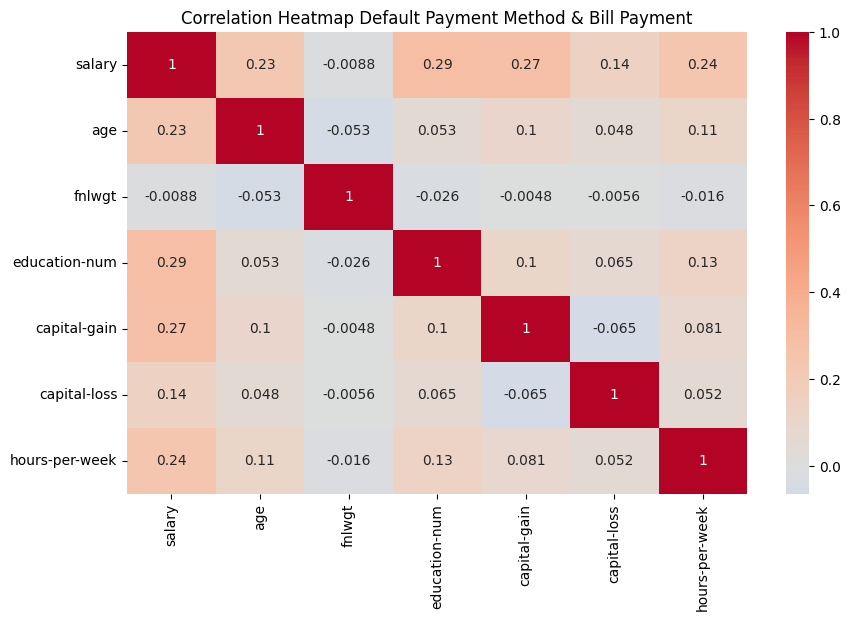

In [401]:
kendall_corr_matrix = corr_num.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap Default Payment Method & Bill Payment')
plt.show()

age, education-num, capital-gain, capital-loss hours-per-week memiliki korelasi > 0.01, maka akan dimasukkan pada feature selection.

###b. categorical columns

In [402]:
corr_cat = df_duplicate[['salary', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]

In [403]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# encode categorical values
lab_encode = preprocessing.LabelEncoder()

df_category = df_duplicate.select_dtypes(include='object')
encode_cat = corr_cat.copy()

for column in df_category.columns:
    encode_cat[column] = lab_encode.fit_transform(df_category[column])

In [404]:
encode_cat

,salary,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,7,9,4,1,1,4,1,39
1,0,6,9,2,4,0,4,1,39
2,0,4,11,0,6,1,4,1,39
3,0,4,1,2,6,0,2,1,39
4,0,4,9,2,10,5,2,0,5
...,...,...,...,...,...,...,...,...,...
32556,0,4,7,2,13,5,4,0,39
32557,1,4,11,2,7,0,4,1,39
32558,0,4,11,6,1,4,4,0,39
32559,0,4,11,4,1,3,4,1,39


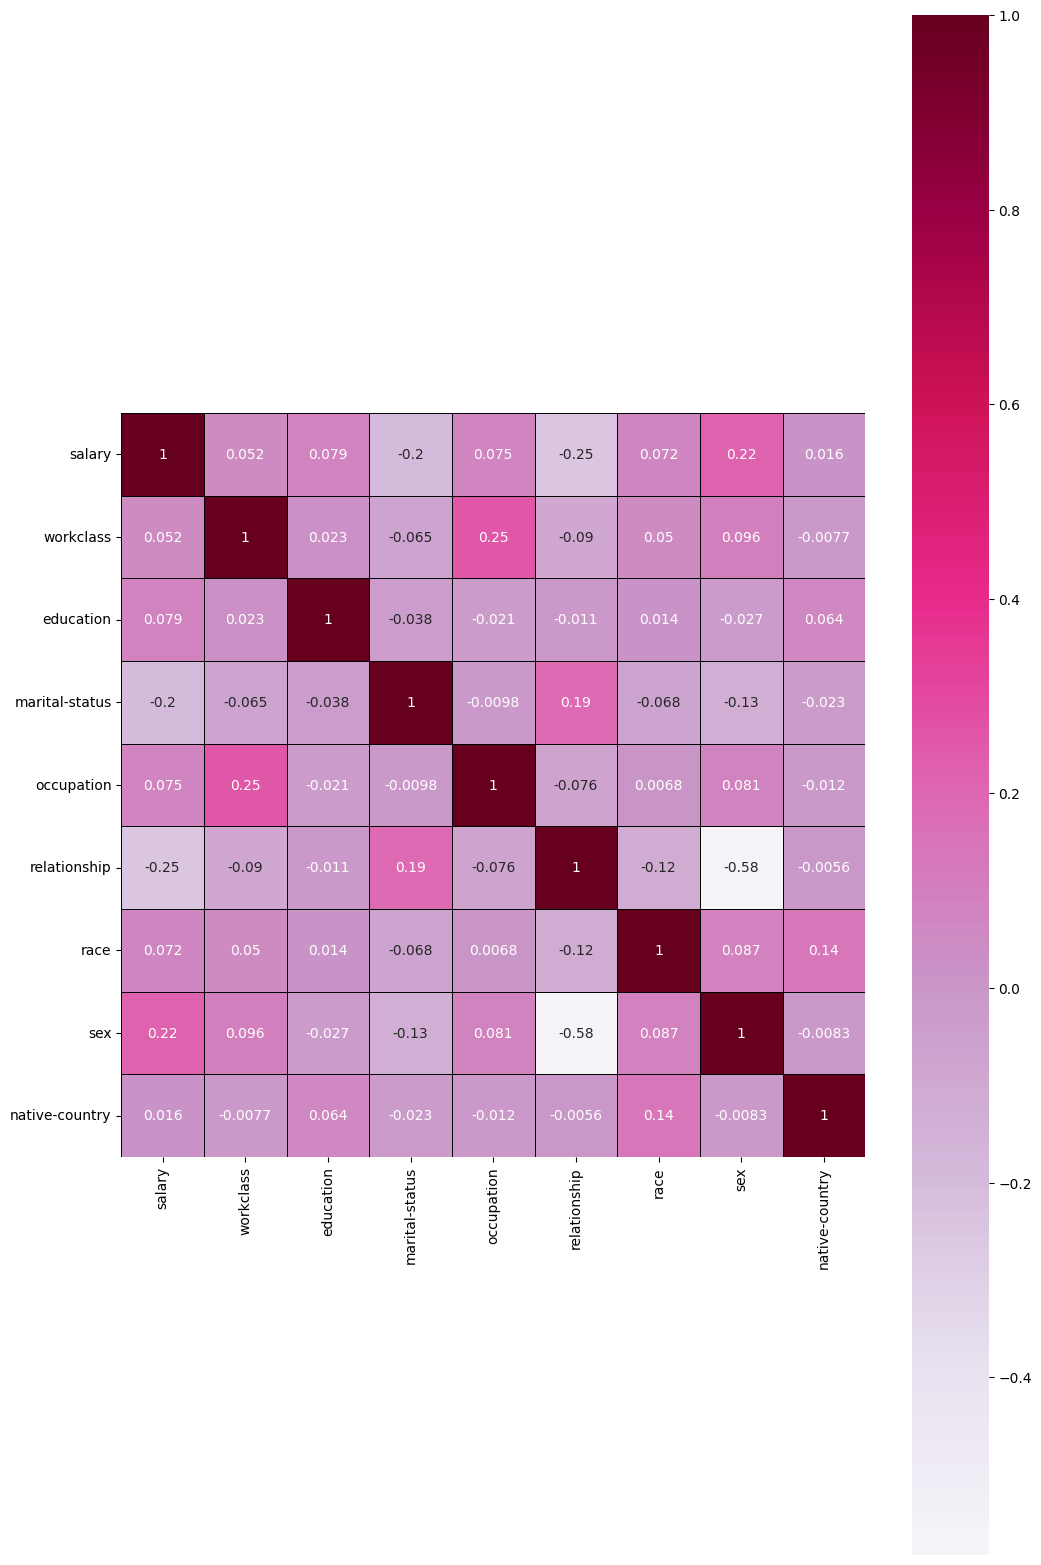

In [405]:
def heat_map(df_name,column_list):
    df_heatmap = df_name[column_list]
    plt.figure(figsize=(12,20))

    sns.heatmap(df_heatmap.corr(),
                annot=True,
                cmap="PuRd",
                linewidths=.5,
                linecolor='black',
                square=True)
heat_map_modeling = ['salary', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
heat_map(encode_cat,heat_map_modeling)

In [406]:
from scipy.stats import kendalltau
from scipy import stats

# correlation for categorical values
kendall_workclass, p_value_workclass = kendalltau(df_duplicate['workclass'], df_duplicate['salary'])
print(f"Korelasi Kendall workclass: {kendall_workclass}")
print(f"P-Value workclass: {p_value_workclass}")
print('==========================================')
kendall_education, p_value_education = kendalltau(df_duplicate['education'], df_duplicate['salary'])
print(f"Korelasi Kendall education: {kendall_education}")
print(f"P-Value education: {p_value_education}")
print('==========================================')
kendall_marital, p_value_marital = kendalltau(df_duplicate['marital-status'], df_duplicate['salary'])
print(f"Korelasi Kendall marital status: {kendall_marital}")
print(f"P-Value marital status: {p_value_marital}")
print('==========================================')
kendall_occupation, p_value_occupation = kendalltau(df_duplicate['occupation'], df_duplicate['salary'])
print(f"Korelasi Kendall occupation: {kendall_occupation}")
print(f"P-Value occupation: {p_value_occupation}")
print('==========================================')
kendall_relationship, p_value_relationship = kendalltau(df_duplicate['relationship'], df_duplicate['salary'])
print(f"Korelasi Kendall relationship: {kendall_relationship}")
print(f"P-Value relationship: {p_value_relationship}")
print('==========================================')
kendall_race, p_value_race = kendalltau(df_duplicate['race'], df_duplicate['salary'])
print(f"Korelasi Kendall race: {kendall_race}")
print(f"P-Value race: {p_value_race}")
print('==========================================')
kendall_sex, p_value_sex = kendalltau(df_duplicate['sex'], df_duplicate['salary'])
print(f"Korelasi Kendall sex: {kendall_sex}")
print(f"P-Value sex: {p_value_sex}")
print('==========================================')
kendall_native, p_value_native = kendalltau(df_duplicate['native-country'], df_duplicate['salary'])
print(f"Korelasi Kendall native country: {kendall_native}")
print(f"P-Value native country: {p_value_native}")

Korelasi Kendall workclass: 0.06059340302256165
P-Value workclass: 3.448412460615653e-31
Korelasi Kendall education: 0.026277872110026353
P-Value education: 8.422666114964545e-08
Korelasi Kendall marital status: -0.22077898144213176
P-Value marital status: 0.0
Korelasi Kendall occupation: 0.07016452620108475
P-Value occupation: 1.3111240461789629e-49
Korelasi Kendall relationship: -0.3005710731917255
P-Value relationship: 0.0
Korelasi Kendall race: 0.08048671835217563
P-Value race: 1.7506355775649716e-49
Korelasi Kendall sex: 0.21596916716098086
P-Value sex: 0.0
Korelasi Kendall native country: 0.02780349542532779
P-Value native country: 2.793890958472203e-07


semua column categorical memiliki p-value < 0.05, maka semua akan dimasukkan pada feature selection.

###c. x train-test selected

In [407]:
# x train & test selected mengikutsertakan columns yang menunjukkan korelasi > 0.01
x_train_selected = x_train_capped[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week',
                                   'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
x_test_selected = x_test_capped[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week',
                                   'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
x_train_selected.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
29199,19.0,264593,10.0,0,0,40.0,Private,Some-college,Never-married,Sales,Other-relative,White,Male,United-States
29696,32.0,29933,13.0,0,0,50.0,Private,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
4432,40.0,230478,12.0,0,0,32.5,Self-emp-not-inc,Assoc-acdm,Divorced,Exec-managerial,Not-in-family,White,Male,United-States
13365,18.0,171748,10.0,0,0,32.5,?,Some-college,Never-married,?,Own-child,Black,Female,United-States
15450,31.0,325355,13.0,0,1902,40.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [408]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
data_VIF = x_train_selected[['age', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']]
calc_vif(data_VIF)

,variables,VIF
0,age,8.581730
1,education-num,16.101181
2,capital-gain,1.034213
3,capital-loss,1.056007
4,hours-per-week,20.236212


age, education-num, hours-per-week memiliki VIF > 5.0, yang berarti data tersebut memiliki multicollinearity yang tinggi. akan di-remove dari feature selection.

###d. hasil feature selection

In [409]:
# split numerical & categorical
x_train_num = x_train_selected[['capital-gain', 'capital-loss']]
x_train_cat = x_train_selected[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
x_test_num = x_test_selected[['capital-gain', 'capital-loss']]
x_test_cat = x_test_selected[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]

##VI. Feature Scaling

In [410]:
scaler = MinMaxScaler()
model = scaler.fit(x_train_num[['capital-gain', 'capital-loss']])
train_scaller = model.transform(x_train_num[['capital-gain', 'capital-loss']])
test_scaller = scaler.transform(x_test_num[['capital-gain', 'capital-loss']])
train_scaller

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

##VII. Data Encoding

In [411]:
from sklearn.preprocessing import OneHotEncoder

In [412]:
from sklearn.preprocessing import OneHotEncoder

# Create and fit the encoder on the training set
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
encode_train = enc.fit_transform(x_train_cat[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])

# Transform the test set using the fitted encoder
encode_test = enc.transform(x_test_cat[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])

data-data categorical sudah di-encode menjadi versi numerical.

##VIII. Concate Data

In [413]:
# menggabungkan feature scaling dan data encoding
x_train_final = np.concatenate([train_scaller, encode_train], axis=1)
x_test_final = np.concatenate([test_scaller, encode_test], axis=1)

In [414]:
x_train_final

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

##IX. Smoothing

In [415]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)

x_res, y_res = cc.fit_resample(x_train_final, y_train)
y_res.value_counts()

0    6286
1    6286
Name: salary, dtype: int64

persebaran data nilai 0 dan 1 sudah merata setelah dilakukan smoothing.

#6. Model Definition

##I. Pipeline

In [416]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

# Pipeline hanya memasukkan model karena proses scaling dan encoding sudah dilakukan sebelumnya
# Pipeline digunakan untuk menyederhanakan dan mengotomatisasi proses pengembangan model
# Metrics utama yang dievaluasi adalah recall untuk meminimalisir False Negative, namun skor lainnya juga akan dilihat sebagai faktor pendukung

# Making pipeline for Decision Tree
pipe_knn = Pipeline([
('classifier', KNeighborsClassifier())
])

# Making pipeline for SVM
pipe_svm = Pipeline([
('classifier', SVC())
])

# Making pipeline for Decision Tree
pipe_dt = Pipeline([
('classifier', DecisionTreeClassifier())
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
('classifier', RandomForestClassifier())
])

# Making pipeline for XGBoost
pipe_xgb = Pipeline([
('classifier', XGBClassifier())
])

##II. models to run

###a. KNN

In [417]:
pipe_knn.fit(x_res, y_res)

Pipeline(steps=[('classifier', KNeighborsClassifier())])

In [418]:
y_train_predict_knn = pipe_knn.predict(x_res)
print('Default Value KNN data x_train')
print(classification_report(y_res,y_train_predict_knn))

Default Value KNN data x_train
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      6286
           1       0.90      0.53      0.66      6286

    accuracy                           0.73     12572
   macro avg       0.78      0.73      0.72     12572
weighted avg       0.78      0.73      0.72     12572



In [419]:
y_test_predict_knn = pipe_knn.predict(x_test_final)
print('Default Value KNN dari Data x_test')
print(classification_report(y_test,y_test_predict_knn))

Default Value KNN dari Data x_test
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4955
           1       0.60      0.48      0.53      1553

    accuracy                           0.80      6508
   macro avg       0.72      0.69      0.70      6508
weighted avg       0.79      0.80      0.79      6508



###b. SVM

In [420]:
pipe_svm.fit(x_res, y_res)

Pipeline(steps=[('classifier', SVC())])

In [421]:
y_train_predict_svm = pipe_svm.predict(x_res)
print('Default Value SVM data x_train')
print(classification_report(y_res,y_train_predict_svm))

Default Value SVM data x_train
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      6286
           1       0.83      0.89      0.86      6286

    accuracy                           0.85     12572
   macro avg       0.85      0.85      0.85     12572
weighted avg       0.85      0.85      0.85     12572



In [422]:
y_test_predict_svm = pipe_svm.predict(x_test_final)
print('Default Value SVM data x_test')
print(classification_report(y_test,y_test_predict_svm))

Default Value SVM data x_test
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4955
           1       0.50      0.89      0.64      1553

    accuracy                           0.76      6508
   macro avg       0.72      0.80      0.73      6508
weighted avg       0.84      0.76      0.78      6508



###c. Decision Tree

In [423]:
pipe_dt.fit(x_res, y_res)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [424]:
y_train_predict_dt = pipe_dt.predict(x_res)
print('Default Value Decision Tree data x_train')
print(classification_report(y_res,y_train_predict_dt))

Default Value Decision Tree data x_train
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6286
           1       0.91      0.96      0.93      6286

    accuracy                           0.93     12572
   macro avg       0.93      0.93      0.93     12572
weighted avg       0.93      0.93      0.93     12572



In [425]:
y_test_predict_dt = pipe_dt.predict(x_test_final)
print('Default Value Decision Tree data x_test')
print(classification_report(y_test,y_test_predict_dt))

Default Value Decision Tree data x_test
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      4955
           1       0.49      0.90      0.63      1553

    accuracy                           0.75      6508
   macro avg       0.72      0.80      0.72      6508
weighted avg       0.84      0.75      0.77      6508



###d. Random Forest

In [426]:
pipe_rf.fit(x_res, y_res)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [427]:
y_train_predict_rf = pipe_rf.predict(x_res)
print('Default Value Random Forest data x_train')
print(classification_report(y_res,y_train_predict_rf))

Default Value Random Forest data x_train
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6286
           1       0.90      0.97      0.93      6286

    accuracy                           0.93     12572
   macro avg       0.93      0.93      0.93     12572
weighted avg       0.93      0.93      0.93     12572



In [428]:
y_test_predict_rf = pipe_rf.predict(x_test_final)
print('Default Value Random Forest data x_test')
print(classification_report(y_test,y_test_predict_rf))

Default Value Random Forest data x_test
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      4955
           1       0.49      0.90      0.64      1553

    accuracy                           0.75      6508
   macro avg       0.72      0.80      0.72      6508
weighted avg       0.85      0.75      0.77      6508



###e. XGBoost

In [429]:
from xgboost import XGBClassifier
pipe_xgb.fit(x_res, y_res)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [430]:
y_train_predict_xgb = pipe_xgb.predict(x_res)
print('Default Value XGBoost data x_train')
print(classification_report(y_res,y_train_predict_xgb))

Default Value XGBoost data x_train
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6286
           1       0.88      0.93      0.90      6286

    accuracy                           0.90     12572
   macro avg       0.90      0.90      0.90     12572
weighted avg       0.90      0.90      0.90     12572



In [431]:
y_test_predict_xgb = pipe_xgb.predict(x_test_final)
print('Default Value XGBoost data x_test')
print(classification_report(y_test,y_test_predict_xgb))

Default Value XGBoost data x_test
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      4955
           1       0.51      0.91      0.66      1553

    accuracy                           0.77      6508
   macro avg       0.74      0.82      0.74      6508
weighted avg       0.86      0.77      0.79      6508



Overall, semua model menunjukkan nilai recall yang cukup tinggi kecuali KNN/ model **Random Forest** memiliki nilai yang paling tinggi (0.97), yang berarti model tersebut merupakan yang paling ampuh untuk mengatasi isu prediksi False Negative.

##III. Model Comparison

In [432]:
x_res = pd.DataFrame(x_res)

###a. KNN

In [433]:
pipe_knn.fit(x_res, y_res)
print('Training Score: ',round(pipe_knn.score(x_res, y_res),4))
print('Testing Score: ', round(pipe_knn.score(x_test_final, y_test),4))

Training Score:  0.7343
Testing Score:  0.7984


###b. SVM

In [434]:
pipe_svm.fit(x_res, y_res)
print('Training Score: ',round(pipe_svm.score(x_res, y_res),4))
print('Testing Score: ', round(pipe_svm.score(x_test_final, y_test),4))

Training Score:  0.8501
Testing Score:  0.7583


###c. Decision Tree

In [435]:
pipe_dt.fit(x_res, y_res)
print('Training Score: ',round(pipe_dt.score(x_res, y_res),4))
print('Testing Score: ', round(pipe_dt.score(x_test_final, y_test),4))

Training Score:  0.9325
Testing Score:  0.7514


###d. Random Forest

In [436]:
pipe_rf.fit(x_res, y_res)
print('Training Score: ',round(pipe_rf.score(x_res, y_res),4))
print('Testing Score: ', round(pipe_rf.score(x_test_final, y_test),4))

Training Score:  0.9325
Testing Score:  0.7517


###e. XGBoost

In [437]:
pipe_xgb.fit(x_res, y_res)
print('Training Score: ',round(pipe_xgb.score(x_res, y_res),4))
print('Testing Score: ', round(pipe_xgb.score(x_test_final, y_test),4))

Training Score:  0.8998
Testing Score:  0.7718


model **Random Forest** juga menunjukkan nilai training score paling tinggi (0.9325), meskipun ada sedikit isu overfitting yang terlihat dari perbandingan score terhadap testing score. Namun, perbedaan yang signifikan dapat terlihat juga pada model-model yang lainnya.

##IV. Cross-Validation

###a. cross-val: KNN

In [438]:
%%time
recall_cross_val = cross_val_score(pipe_knn,
                                     x_res,
                                     y_res,
                                     cv=5,
                                     scoring="recall")

print('recall - all - Cross Validation  : ', recall_cross_val)
print('recall - mean - Cross Validation : ', recall_cross_val.mean())
print('recall - std - Cross Validation  : ', recall_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

recall - all - Cross Validation  :  [0.51551313 0.4872814  0.54176611 0.52108194 0.48050915]
recall - mean - Cross Validation :  0.5092303450439066
recall - std - Cross Validation  :  0.022561795167041432
recall - Range of Test-Set       :  0.4866685498768652 - 0.531792140210948
CPU times: user 2.77 s, sys: 5.96 ms, total: 2.77 s
Wall time: 1.77 s


###b. cross-val: SVM

In [439]:
%%time
recall_cross_val = cross_val_score(pipe_svm,
                                     x_res,
                                     y_res,
                                     cv=5,
                                     scoring="recall")

print('recall - all - Cross Validation  : ', recall_cross_val)
print('recall - mean - Cross Validation : ', recall_cross_val.mean())
print('recall - std - Cross Validation  : ', recall_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

recall - all - Cross Validation  :  [0.87350835 0.86804452 0.88703262 0.87191726 0.86873508]
recall - mean - Cross Validation :  0.8738475665051546
recall - std - Cross Validation  :  0.00689201841743652
recall - Range of Test-Set       :  0.8669555480877181 - 0.8807395849225911
CPU times: user 27.5 s, sys: 327 ms, total: 27.9 s
Wall time: 28.6 s


###c. cross-val: Decision Tree

In [440]:
%%time
recall_cross_val = cross_val_score(pipe_dt,
                                     x_res,
                                     y_res,
                                     cv=5,
                                     scoring="recall")

print('recall - all - Cross Validation  : ', recall_cross_val)
print('recall - mean - Cross Validation : ', recall_cross_val.mean())
print('recall - std - Cross Validation  : ', recall_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

recall - all - Cross Validation  :  [0.88464598 0.8608903  0.87271281 0.86475736 0.86475736]
recall - mean - Cross Validation :  0.8695527620839989
recall - std - Cross Validation  :  0.008471377614369805
recall - Range of Test-Set       :  0.8610813844696291 - 0.8780241396983687
CPU times: user 413 ms, sys: 0 ns, total: 413 ms
Wall time: 410 ms


###d. cross-val: Random Forest

In [441]:
%%time
recall_cross_val = cross_val_score(pipe_rf,
                                     x_res,
                                     y_res,
                                     cv=5,
                                     scoring="recall")

print('recall - all - Cross Validation  : ', recall_cross_val)
print('recall - mean - Cross Validation : ', recall_cross_val.mean())
print('recall - std - Cross Validation  : ', recall_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

recall - all - Cross Validation  :  [0.8973747  0.87440382 0.88862371 0.88862371 0.87350835]
recall - mean - Cross Validation :  0.884506856990361
recall - std - Cross Validation  :  0.00919257166999722
recall - Range of Test-Set       :  0.8753142853203638 - 0.8936994286603582
CPU times: user 6.99 s, sys: 20.9 ms, total: 7.01 s
Wall time: 7.07 s


###e. cross-val: XGBoost

In [442]:
%%time
recall_cross_val = cross_val_score(pipe_xgb,
                                     x_res,
                                     y_res,
                                     cv=5,
                                     scoring="recall")

print('recall - all - Cross Validation  : ', recall_cross_val)
print('recall - mean - Cross Validation : ', recall_cross_val.mean())
print('recall - std - Cross Validation  : ', recall_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

recall - all - Cross Validation  :  [0.91487669 0.90222576 0.92044551 0.91249006 0.89817025]
recall - mean - Cross Validation :  0.9096416506356138
recall - std - Cross Validation  :  0.008232022140515565
recall - Range of Test-Set       :  0.9014096284950982 - 0.9178736727761293
CPU times: user 4.15 s, sys: 24 ms, total: 4.18 s
Wall time: 2.58 s


Nilai tertinggi recall beserta standard deviation terbaik sekarang justru ditunjukkan oleh model **XGBooster**.

##V. Base Model Comparison

In [443]:
models = {
    'KNN' : pipe_knn,
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_res, models[model].predict(x_res))

In [444]:
df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,0.73433,0.850143,0.932469,0.932469,0.899777
F1-Score,0.664524,0.855255,0.934079,0.934727,0.902793


**Random Forest** kembali menunjukkan nilai accuracy dan F1-Score tertinggi dibandingkan yang lainnya. Maka sebab itu, dari semua evaluasi yang sudah dilakukan, model tersebut akan digunakan untuk proses pembuatan model yang akhirnya akan digunakan untuk memprediksi data.

##VI. Tuning Parameter

In [445]:
# Parameter Tuning
param_rf = {
    'classifier__n_estimators' : np.arange(200,401, 100),
    'classifier__max_depth' : np.arange(4,8,2)
}

##VII. GridSearch

**Random Forest**

In [446]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(x_res, y_res)

In [447]:
print('Train Set Score : ', grid_rf.score(x_res, y_res))
print('Test Set Score : ', grid_rf.score(x_test_final, y_test))

Train Set Score :  0.8239739102768056
Test Set Score :  0.7317148125384143


In [448]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 6, 'classifier__n_estimators': 200}


Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=200))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [449]:
print(classification_report(y_res, best_pipe_rf.predict(x_res)))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      6286
           1       0.79      0.88      0.83      6286

    accuracy                           0.82     12572
   macro avg       0.83      0.82      0.82     12572
weighted avg       0.83      0.82      0.82     12572



Seperti yang sudah dijelaskan, model **Random Forest** memiliki isu overfitting. Namun, model ini tetap akan digunakan mengingat kelebihan yang diperlihatkan pada aspek-aspek lainnya.

##VIII. Model after tuning comparison

In [450]:
models = {
    'Random Forest' : best_pipe_rf
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_res, models[model].predict(x_res))

In [451]:
df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,0.73433,0.850143,0.932469,0.932469,0.899777
F1-Score,0.664524,0.855255,0.934079,0.934727,0.902793


In [452]:
model_tuning

,Random Forest
Accuracy,0.823974
F1-Score,0.833871


Setelah model tuning, akurasi dari model terbaik (Random Forest) justru malah turun signifikan. Ini menunjukkan bahwa hasil modelling default lebih bagus dari model yang dilakukan tuning. Maka dari itu, **pipeline Random Forest** yang dibuat di awal akan digunakan dalam proses selanjutnya.

#7. Model Training

F1 Score - Train Set   :  0.9347274544476051 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6286
           1       0.90      0.97      0.93      6286

    accuracy                           0.93     12572
   macro avg       0.93      0.93      0.93     12572
weighted avg       0.93      0.93      0.93     12572
 

Confusion Matrix     :


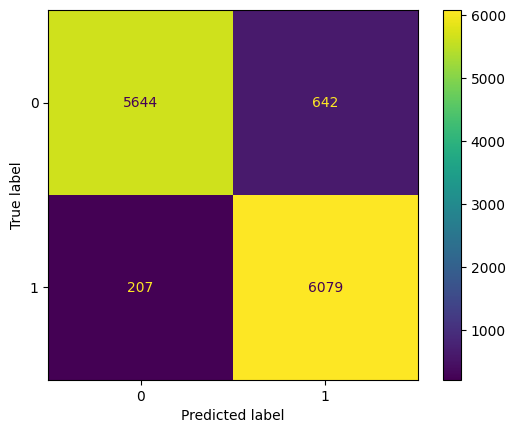

In [453]:
# check performance against train set
y_pred_train = pipe_rf.predict(x_res)

print('F1 Score - Train Set   : ', f1_score(y_res, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_res, y_pred_train), '\n')
print('Confusion Matrix     :')
cm = confusion_matrix(y_res, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Train-set menunjukkan bahwa 6071 orang diprediksi dengan tepat memiliki gaji di atas USD 50K dan 5651 orang diprediksi dengan tepat memiliki gaji di bawah USD50K. F1-Score dan recall score yang dihasilkan cukup tinggi, menunjukkan kebagusan model untuk keperluan prediksi.

#8. Model Evaluation

F1 Score - Train Set   :  0.6338921613049389 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81      4955
           1       0.49      0.90      0.63      1553

    accuracy                           0.75      6508
   macro avg       0.72      0.80      0.72      6508
weighted avg       0.85      0.75      0.77      6508
 

Confusion Matrix     :


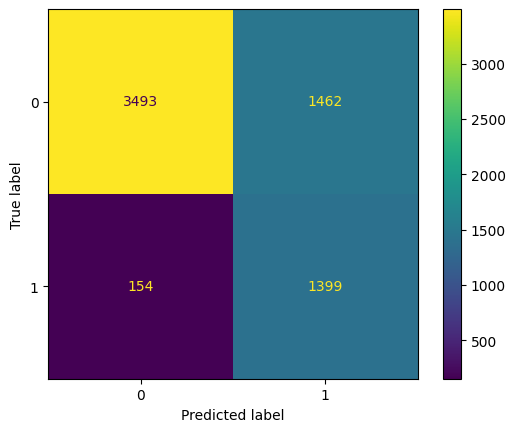

In [454]:
# check performance against train set
y_pred_test = pipe_rf.predict(x_test_final)

print('F1 Score - Train Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix     :')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Train-set menunjukkan bahwa 1399 orang diprediksi dengan tepat memiliki gaji di atas USD 50K dan 3498 orang diprediksi dengan tepat memiliki gaji di bawah USD50K. Meskipun F1-Score yang dihasilkan lebih rendah dibangingkan model training, nilai recall yang dihasilkan cukup tinggi terutama untuk nilai '1' yang merupakan prioritas dari prediksi data.

#9. Model Saving

In [455]:
with open('pipe_rf.pkl', 'wb') as file_1:
  pickle.dump(pipe_rf, file_1)
with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)
with open('enc.pkl', 'wb') as file_3:
  pickle.dump(enc, file_3)

#10. Model Inference

In [456]:
with open('pipe_rf.pkl', 'rb') as file_1:
  pipe_rf = pickle.load(file_1)
with open('scaler.pkl', 'rb') as file_2:
  scaler = pickle.load(file_2)
with open('enc.pkl', 'rb') as file_3:
  enc = pickle.load(file_3)

In [457]:
# membuat data dummy dengan mengambil semua column beserta data row pertama
data_dummy = {
    'age': 39,
    'workclass': ' State-gov',
    'fnlwgt':  77516,
    'education': ' Bachelors',
    'education-num': 13,
    'marital-status': ' Never-married',
    'occupation': ' Adm-clerical',
    'relationship': ' Not-in-family',
    'race': ' White',
    'sex': ' Male',
    'capital-gain':  2174,
    'capital-loss':    0,
    'hours-per-week': 40,
    'native-country': ' United-States'
}

dummy = pd.DataFrame([data_dummy])
dummy

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States


In [458]:
scaler=scaler.transform(dummy[['capital-gain', 'capital-loss']])

In [459]:
enc=enc.transform(dummy[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])

In [460]:
new_data = np.concatenate([scaler, enc], axis=1)

In [461]:
new_data =pd.DataFrame(new_data)
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.02174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [462]:
# fungsi untuk memprediksi data
prediction=pipe_rf.predict(new_data)

In [463]:
new_data['prediction']=prediction
new_data

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,prediction
0,0.02174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [464]:
# pengetesan prediksi data sebanyak 1 kali
dummy['prediction']=prediction
dummy

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,prediction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


#11. Conclusion

Tujuan dari milestone 2 adalah memprediksi data penghasilan dengan target klasifikasi apakah penghasilan orang-orang dari dataset lebih atau kurang dari USD 50K berdasarkan karakteristik-karakteristik yang tertera. Dari proses feature engineering, model yang dirancang memasukkan data numerikal yaitu capital gain & loss, dan juga data kategorikal workclass, education, marital status, occupation, relationship, race, sex, native country.

Dengan menggunakan pipeline, model yang digunakan adalah Random Forest karena skor recall, F1-Score, dan accuracy yang paling tinggi dihasilkan, dan juga skor standard deviation yang cukup rendah. Alasan pemilihan model dengan prioritas melihat approach recall juga mempertimbangkan peminimalisiran prediksi False Negative. Pemilihan model Random Forest juga makin didukung dengan train-score yang paling tinggi dibandingkan model lainnya. Model training yang kemudian dilakukan juga menunjukkan skor yang tinggi (93%) mengindikasikan kecocokan model pada dataset. Uniknya, model default justru menunjukkan nilai yang lebih tinggi dibandingkan dengan model setelah dilakukan tuning. Dengan itu, pipeline yang dibuat di awal digunakan untuk model training dan melakukan prediksi data.

Pada akhirnya, model prediksi berhasil dibuat di mana semua column dari feature engineering dapat menghasilkan prediksi apakah orang berpenghasilan di bawah USD 50K (0) atau di atas USD 50K (1).

**Jelaskan latar belakang adanya bagging dan cara kerja bagging**:

Bagging dibuat berdasarkan konsep bahwa dengan menggabungkan hasil prediksi dari beberapa model, dapat dikurangi variabilitas, meningkatkan stabilitas, dan secara overall meningkatkan akurasi model. Bagging terbukti efektif saat base model mengalami overfitting pada training.

Berikut adalah langkah-langkah cara kerja bagging:

Bootstrap Sampling:
Setiap model dibangun dari random subset train data yang diambil dengan substitusi, disebut juga bootstrap sampling. Pengambilan dengan penggantian ini memungkinkan beberapa observasi muncul lebih dari sekali dalam subset.

Base Model:
Base Model pada umumnya serupa seperti decision tree, namun dapat bervariasi. Setiap base model dilatih pada subset data yang dihasilkan melalui bootstrap sampling.

Prediksi:
Setelah base model dilatih, setiap model memberikan prediksi untuk setiap observasi dalam pengujian data atau data yang sebelumnya belum muncul.

Aggregation:
Prediksi dari setiap model digabungkan untuk menghasilkan final prediction. Metode umum untuk menggkombinasikan prediksi melibatkan penghitungan average (regresi) atau melakukan voting (klasifikasi).

**Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih**

Perbedaan Random Forest vs XGBoost:
- Random Forest menggunakan konsep bagging (decision tree dibangun satu persatu secara independen), sedangkan XGBoost menggunakan konsep boosting (decision tree dibangun secara berurutan).
- Random Forest membangun decision tree dari subset acak dari train-data dengan bootstrap sampling, sedangkan XGBoost membangun decision tree yang mencoba memperbaiki error dari model-model sebelumnya.
- Random forest membangun decision tree, secara independen, memungkinkan pemrosesan paralel sehingga lebih efisien, XGBoost membangun decision tree secara berurutan sehingga memungkinkan untuk "learn & remember" dari apa yang sudah dibuat sebelumnya.

**Jelaskan apa yang dimaksud dengan Cross Validation**

Cross Validation merupakan metode evaluasi kinerja model dalam machine learning yang digunakan untuk menilai kemampuan model menggeneralisasi data yang belum pernah diolah dan diproses sebelumnya. Tujuan utama dari cross-validation adalah mencegah overfitting dan memastikan bahwa model mampu memberikan kinerja yang optimal pada subset data yang berbeda-beda.

Proses cross-validation terdiri pembagian dataset ke dalam beberapa subset, yang kemudian akan digunakan sebagai train data dan testing untuk model.

Berikut adalah langkah-langkah cross validation:
- Pembagian dataset
- K-Fold iteration
- Model Evaluation
- Penggabungan hasil